In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import xgboost as xgb
from datetime import datetime
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

# TRAIN

In [2]:
train = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\GitHub\githubtest\Data\train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [3]:
# train = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/train.csv')
# train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Types

**ORDINAL
_________
LotShape
LandContour
Utilities
LandSlope
OverallQual
OverallCond
YearBuilt*
YearRemodAdd
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
HeatingQC
CentralAir
KitchenQual
Functional
FireplaceQu
GarageYrBlt*
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscVal*

**NOMINAL
_________
MSSubClass
MSZoning
Street
Alley
LotConfig
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
Electrical
GarageType
PavedDrive
MiscFeature
SaleType
SaleCondition

**CONTINUOUS
_________
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MoSold
YrSold

Null Features

In [5]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

## Data Cleaning

### Duplicates

In [6]:
train['Id'].value_counts()

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64

### Null Features

#### Lot Frontage

In [7]:
null_LotFrontage = train[train['LotFrontage'].isnull()]
null_LotFrontage

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,LwQ,958,Unf,0,0,958,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,0,NaN,Attchd,1976.0,RFn,2,440,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952

In [8]:
train['LotFrontage'].value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


In [9]:
null_LotFrontage['Neighborhood'].value_counts()

Neighborhood
NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Somerst     8
NoRidge     8
Edwards     8
Timber      8
BrkSide     7
StoneBr     5
OldTown     4
Veenker     4
Blmngtn     3
IDOTRR      3
NPkVill     2
MeadowV     2
SWISU       2
NridgHt     1
Name: count, dtype: int64

In [10]:
train.groupby('Neighborhood')['LotFrontage'].agg(pd.Series.mode)

Neighborhood
Blmngtn                   43.0
Blueste                   24.0
BrDale                    21.0
BrkSide                   50.0
ClearCr                   80.0
CollgCr           [65.0, 70.0]
Crawfor                   80.0
Edwards                   60.0
Gilbert     [59.0, 60.0, 65.0]
IDOTRR                    60.0
MeadowV                   21.0
Mitchel    [32.0, 75.0, 100.0]
NAmes                     70.0
NPkVill                   24.0
NWAmes                    80.0
NoRidge           [82.0, 92.0]
NridgHt                  107.0
OldTown                   60.0
SWISU                     60.0
Sawyer                    70.0
SawyerW                   65.0
Somerst                   75.0
StoneBr                   41.0
Timber                    85.0
Veenker                   80.0
Name: LotFrontage, dtype: object

In [11]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [12]:
train['LotFrontage'].isnull().sum()

0

#### Alley

In [13]:
train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [14]:
train['Alley'].isnull().sum()

1369

In [15]:
train['Alley'] = np.where(train['Alley'].isnull, 'NA', train['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count

In [16]:
train['Alley'].isnull().sum()

0

#### MasVnrType

In [17]:
train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [18]:
train['MasVnrType'].isnull().sum()

872

In [19]:
train['MasVnrType'] = np.where(train['MasVnrType'].isnull, 'NA', train['MasVnrType']) #it is missing None and is the largest value count

In [20]:
train['MasVnrType'].isnull().sum()

0

#### MasVnrArea

In [21]:
train[train['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,59.0,7851,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,80.0,32668,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NA,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NA,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [22]:
train['MasVnrArea'] = np.where(train['MasVnrArea'].isnull(), 0, train['MasVnrArea'])

#### BsmtQual

In [23]:
train['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [24]:
train['BsmtQual'].isnull().sum()

37

In [25]:
train['BsmtFinSF1'].value_counts()

BsmtFinSF1
0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: count, Length: 637, dtype: int64

In [26]:
train[(train['TotalBsmtSF']==0) & (train['BsmtQual'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0

In [27]:
train['BsmtQual'] = np.where(train['BsmtQual'].isnull, 'NA', train['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement

In [28]:
train['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [29]:
train['BsmtCond'].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [30]:
train['BsmtCond'].isnull().sum()

37

In [31]:
train['BsmtCond'] =  np.where(train['BsmtCond'].isnull, 'NA', train['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement

In [32]:
train['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [33]:
train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [34]:
train['BsmtExposure'].isnull().sum()

38

In [35]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,NA,0.0,TA,TA,CBlock,NA,NA,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0

In [36]:
train['BsmtExposure'] = np.where((train['BsmtExposure'].isnull()) & (train['TotalBsmtSF']==0), 'NA', train['BsmtExposure'])

In [37]:
train[train['BsmtExposure'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NA,144.0,Gd,TA,PConc,NA,NA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [38]:
train['BsmtExposure'] = np.where(train['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), train['BsmtExposure'])

In [39]:
train['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [40]:
train['BsmtFinType1'].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [41]:
train['BsmtFinType1'].isnull().sum()

37

In [42]:
train['BsmtFinType1'] = np.where(train['BsmtFinType1'].isnull(), 'NA', train['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement

In [43]:
train['BsmtFinType1'].isnull().sum()

0

#### BsmtFinType2

In [44]:
train['BsmtFinType2'].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [45]:
train['BsmtFinType2'].isnull().sum()

38

In [46]:
train[train['BsmtFinType2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,NA,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,NA,0.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,NA,0.0,TA,Fa,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,NA,98.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,PConc,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
332,333,20,RL,85.0,10655,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,NA,296.0,Gd,TA,PConc,NA,NA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
342,343,90,RL,70.0,8544,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,NA,340.0,TA,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,NA,500.0,Gd,TA,Slab,NA,NA,NA,NA,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,

In [47]:
train['BsmtFinType2'] = np.where((train['BsmtFinType2'].isnull() & train['BsmtUnfSF'] > 0), 'Unf', train['BsmtFinType2'])

In [48]:
train['BsmtFinType2'].isnull().sum()

37

In [49]:
train['BsmtFinType2'] = np.where(train['BsmtFinType2'].isnull(), 'NA', train['BsmtFinType2'])

In [50]:
train['BsmtFinType2'].isnull().sum()

0

#### Electrical

In [51]:
train['Electrical'].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [52]:
train['Electrical'].isnull().sum()

1

In [53]:
train['Electrical'] = np.where(train['Electrical'].isnull(), train['Electrical'].mode(), train['Electrical']) # only 1 null value, just filled it in with mode

In [54]:
train['Electrical'].isnull().sum()

0

#### FireplaceQu

In [55]:
train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [56]:
train['FireplaceQu'].isnull().sum()

690

In [57]:
train[train['FireplaceQu'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,196.0,Gd,TA,PConc,NA,NA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,Wood,NA,NA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,NA,0.0,TA,TA,CBlock,NA,NA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,129500
12,13,20,RL,70.0,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,NA,0.0,TA,TA,CBlock,NA,NA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,NA,NA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,NA,80.0,TA,TA,PConc,NA,NA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NA,0.0,Gd,TA,PConc,NA,NA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,N

In [58]:
train['FireplaceQu'] = np.where((train['FireplaceQu'].isnull() & train['Fireplaces']==0), 'NA', train['FireplaceQu'])

In [59]:
train['FireplaceQu'].isnull().sum()

0

#### GarageType

In [60]:
train['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [61]:
train['GarageType'].isnull().sum()

81

In [62]:
train['GarageType'] = np.where((train['GarageType'].isnull() & (train['GarageCars']== 0)), 'NA', train['GarageType']) #if 0 cars then no garage

In [63]:
train['GarageType'].isnull().sum()

0

#### GarageYrBlt

In [64]:
train['GarageYrBlt'].isnull().sum()

81

In [65]:
train['GarageYrBlt'] = np.where((train['GarageYrBlt'].isnull() & (train['GarageCars']==0)), 0, train['GarageYrBlt']) #if 0 cars then no garage

In [66]:
train['GarageYrBlt'].isnull().sum()

0

#### GarageFinish

In [67]:
train['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [68]:
train['GarageFinish'].isnull().sum()

81

In [69]:
train['GarageFinish'] = np.where((train['GarageFinish'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageFinish']) #if 0 cars then no garage

In [70]:
train['GarageFinish'].isnull().sum()

0

#### GarageQual

In [71]:
train['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [72]:
train['GarageQual'].isnull().sum()

81

In [73]:
train['GarageQual'] = np.where((train['GarageQual'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageQual']) #if 0 cars then no garage

In [74]:
train['GarageQual'].isnull().sum()

0

#### GarageCond

In [75]:
train['GarageCond'].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [76]:
train['GarageCond'].isnull().sum()

81

In [77]:
train['GarageCond'] = np.where((train['GarageCond'].isnull() & (train['GarageCars']==0)), 'NA', train['GarageCond']) #if 0 cars then no garage

In [78]:
train['GarageCond'].isnull().sum()

0

#### PoolQC

In [79]:
train['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [80]:
train['PoolQC'].isnull().sum()

1453

In [81]:
train[train['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,196.0,Gd,TA,PConc,NA,NA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,NA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,NA,162.0,Gd,TA,PConc,NA,NA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,NA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,NA,NA,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,NA,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NA,350.0,Gd,TA,PConc,NA,NA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,NA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,NA,NA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,NA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,NA,119.0,TA,TA,CBlock,NA,NA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,NA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NA,0.0,Ex,Gd,Stone,NA,NA,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,NA,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1

In [82]:
train['PoolQC'] = np.where((train['PoolQC'].isnull() & (train['PoolArea']==0)), 'NA', train['PoolQC']) #if no pool area means no pool

In [83]:
train['PoolQC'].isnull().sum()

0

#### Fence

In [84]:
train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [85]:
train['Fence'].isnull().sum()

1179

In [86]:
train['Fence'] = np.where(train['Fence'].isnull(), 'NA', train['Fence']) #largest value that's null and missing category 

In [87]:
train['Fence'].isnull().sum()

0

#### MiscFeature

In [88]:
train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [89]:
train['MiscFeature'].isnull().sum()

1406

In [90]:
train['MiscFeature'] = np.where((train['MiscFeature'].isnull() & (train['GarageType']=='2Types')), 'Gar2', train['MiscFeature']) #if 2types of garage then its 2nd garage

In [91]:
train['MiscFeature'] = np.where(train['MiscFeature'].isnull(), 'NA', train['MiscFeature'])

In [92]:
train['MiscFeature'].isnull().sum()

0

### Datatypes

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Feature Engineering

#### Age of house

In [94]:
train['age'] = datetime.now().year - train['YearBuilt']


#### Age of remodel

In [95]:
train['remodel_age'] = datetime.now().year - train['YearRemodAdd']

#### Living to Lot Area Ratio

In [96]:
train['livingtolot'] = (train['GrLivArea']/train['LotArea']).round(2)

#### Has Paved Driveway

In [97]:
train['PavedDrive'].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [98]:
train['drivewaypaved'] = np.where(train['PavedDrive']=='Y', 1, 0)
train['drivewaypaved'].value_counts()

drivewaypaved
1    1340
0     120
Name: count, dtype: int64

#### Has Fireplace

In [99]:
train['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [100]:
train['has_fireplace'] = np.where(train['Fireplaces']> 0, 1, 0)

#### Has Pool

In [101]:
train['has_pool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [102]:
train['has_pool'].value_counts()

has_pool
0    1453
1       7
Name: count, dtype: int64

## Outliers

### LotArea

<Axes: >

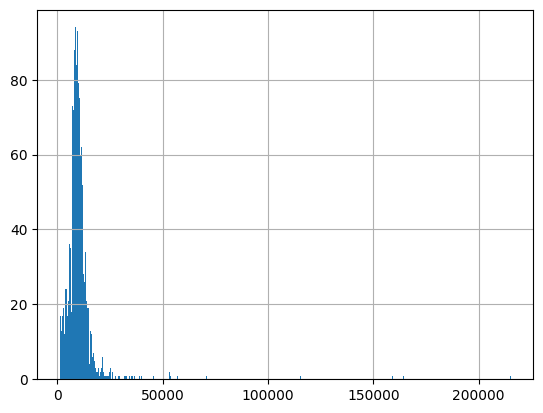

In [103]:
train['LotArea'].hist(bins=500)

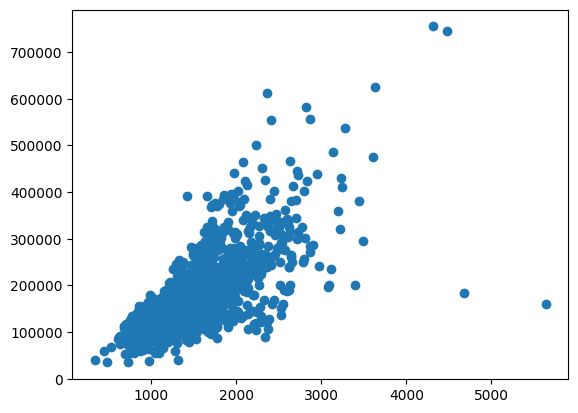

In [104]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

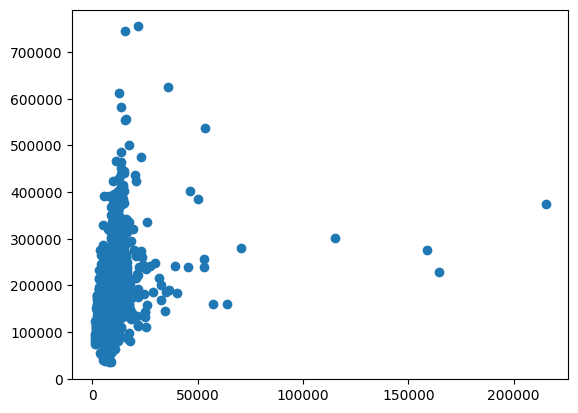

In [105]:
plt.scatter(train['LotArea'], train['SalePrice'])

In [106]:
train = train.drop(train[train['LotArea']> 150000].index).reset_index(drop=True)

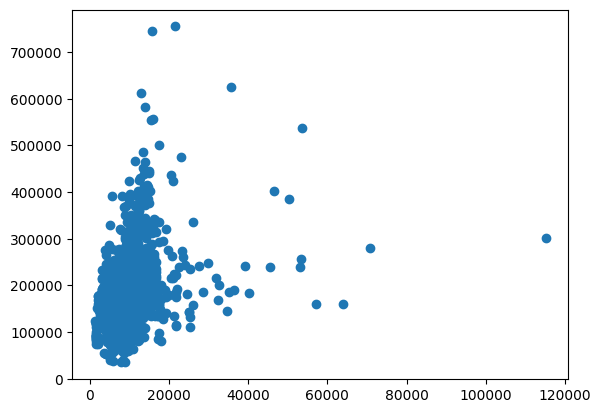

In [107]:
plt.scatter(train['LotArea'], train['SalePrice'])

## Skew

In [108]:
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

MSSubClass        1.405043
LotFrontage       2.149244
LotArea           6.186717
MasVnrArea        2.684427
BsmtFinSF1        1.695853
BsmtFinSF2        4.288669
BsmtUnfSF         0.919753
TotalBsmtSF       1.532585
1stFlrSF          1.384597
2ndFlrSF          0.812622
LowQualFinSF      9.001760
GrLivArea         1.372562
BsmtHalfBath      4.130622
KitchenAbvGr      4.483125
WoodDeckSF        1.514684
OpenPorchSF       2.364643
EnclosedPorch     3.085809
3SsnPorch        10.293487
ScreenPorch       4.117285
PoolArea         14.812955
MiscVal          24.519727
SalePrice         1.893486
livingtolot       2.867890
has_pool         14.337743
dtype: float64

In [109]:
skewed_features = train.skew(numeric_only=True)[train.skew(numeric_only=True) > 0.75]

for feature_name in skewed_features.index:
    print(feature_name)

MSSubClass
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtHalfBath
KitchenAbvGr
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice
livingtolot
has_pool


In [110]:
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

MSSubClass        1.405043
LotFrontage       2.149244
LotArea           6.186717
MasVnrArea        2.684427
BsmtFinSF1        1.695853
BsmtFinSF2        4.288669
BsmtUnfSF         0.919753
TotalBsmtSF       1.532585
1stFlrSF          1.384597
2ndFlrSF          0.812622
LowQualFinSF      9.001760
GrLivArea         1.372562
BsmtHalfBath      4.130622
KitchenAbvGr      4.483125
WoodDeckSF        1.514684
OpenPorchSF       2.364643
EnclosedPorch     3.085809
3SsnPorch        10.293487
ScreenPorch       4.117285
PoolArea         14.812955
MiscVal          24.519727
SalePrice         1.893486
livingtolot       2.867890
has_pool         14.337743
dtype: float64

In [111]:
len(train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75])

24

In [112]:
train['MSSubClass'] = np.log1p(train['MSSubClass'])
train['LotFrontage'] = np.log1p(train['LotFrontage'])
train['LotArea'] = np.log1p(train['LotArea'])
train['MasVnrArea'] = np.log1p(train['MasVnrArea'])
train['BsmtFinSF1'] = np.log1p(train['BsmtFinSF1'])
train['BsmtFinSF2'] = np.log1p(train['BsmtFinSF2'])
train['BsmtUnfSF'] = np.log1p(train['BsmtUnfSF'])
train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])
train['1stFlrSF'] = np.log1p(train['1stFlrSF'])
train['2ndFlrSF'] = np.log1p(train['2ndFlrSF'])
train['LowQualFinSF'] = np.log1p(train['LowQualFinSF'])
train['GrLivArea'] = np.log1p(train['GrLivArea'])
train['BsmtHalfBath'] = np.log1p(train['BsmtHalfBath'])
train['KitchenAbvGr'] = np.log1p(train['KitchenAbvGr'])
train['WoodDeckSF'] = np.log1p(train['WoodDeckSF'])
train['OpenPorchSF'] = np.log1p(train['OpenPorchSF'])
train['EnclosedPorch'] = np.log1p(train['EnclosedPorch'])
train['3SsnPorch'] = np.log1p(train['3SsnPorch'])
train['ScreenPorch'] = np.log1p(train['KitchenAbvGr'])
train['PoolArea'] = np.log1p(train['PoolArea'])
train['MiscVal'] = np.log1p(train['MiscVal'])
train['SalePrice'] = np.log1p(train['SalePrice'])
train.skew(numeric_only=True)[train.skew(numeric_only=True) > .75]

BsmtFinSF2        2.541590
LowQualFinSF      7.452254
BsmtHalfBath      3.957791
KitchenAbvGr      3.864695
EnclosedPorch     2.108812
3SsnPorch         7.726645
ScreenPorch       2.953752
PoolArea         14.348154
MiscVal           5.283240
livingtolot       2.867890
has_pool         14.337743
dtype: float64

## Correlation

In [113]:
train.corr(numeric_only=True)['SalePrice'].abs().sort_values(ascending=True)

livingtolot      0.005010
BsmtHalfBath     0.007991
Id               0.015110
MSSubClass       0.020076
BsmtFinSF2       0.036190
OverallCond      0.037583
YrSold           0.038143
LowQualFinSF     0.054257
MoSold           0.057394
3SsnPorch        0.059319
has_pool         0.070184
PoolArea         0.070298
MiscVal          0.075341
ScreenPorch      0.139347
KitchenAbvGr     0.144016
2ndFlrSF         0.181187
BsmtFinSF1       0.206173
EnclosedPorch    0.206613
BedroomAbvGr     0.208109
BsmtUnfSF        0.209546
BsmtFullBath     0.233094
drivewaypaved    0.299801
HalfBath         0.317006
WoodDeckSF       0.345587
LotFrontage      0.347866
GarageYrBlt      0.349209
TotalBsmtSF      0.372008
LotArea          0.398199
MasVnrArea       0.414968
OpenPorchSF      0.462655
Fireplaces       0.486786
has_fireplace    0.508946
TotRmsAbvGrd     0.534084
YearRemodAdd     0.568387
remodel_age      0.568387
YearBuilt        0.588700
age              0.588700
FullBath         0.594231
1stFlrSF    

## Encoding/Scaling

In [114]:
df = train.copy()

### Ordinal

In [115]:
ord_feats = train[[
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
]]

ord = OrdinalEncoder()
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0
1,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0
2,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0
3,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0
4,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,6.0,6.0,0.0,1.0,3.0,6.0,0.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0
1453,3.0,3.0,0.0,0.0,5.0,5.0,79.0,38.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,4.0,1.0,3.0,2.0,0.0,65.0,3.0,5.0,5.0,3.0,2.0,0.0
1454,3.0,3.0,0.0,0.0,6.0,8.0,44.0,56.0,0.0,2.0,0.0,0.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,30.0,2.0,5.0,5.0,3.0,0.0,17.0
1455,3.0,3.0,0.0,0.0,4.0,5.0,51.0,46.0,3.0,4.0,0.0,0.0,2.0,2.0,5.0,2.0,1.0,2.0,6.0,0.0,37.0,3.0,5.0,5.0,3.0,4.0,0.0


In [116]:
df.drop(columns=ord_feats, inplace=True)
df = df.merge(new_ord_feats, left_index=True, right_index=True)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,1,4.110874,RL,4.189655,9.042040,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,5.283204,PConc,6.561031,0.000000,5.017280,6.753438,GasA,SBrkr,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,Attchd,2,548,Y,0.000000,4.127134,0.000000,0.0,0.526589,0.0,NA,2,2008,WD,Normal,12.247699,21,21,0.20,1,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0
1,2,3.044522,RL,4.394449,9.169623,Pave,NA,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,0.000000,CBlock,6.886532,0.000000,5.652489,7.141245,GasA,SBrkr,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,Attchd,2,460,Y,5.700444,0.000000,0.000000,0.0,0.526589,0.0,NA,5,2007,WD,Normal,12.109016,48,48,0.13,1,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0
2,3,4.110874,RL,4.234107,9.328212,Pave,NA,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,5.093750,PConc,6.188264,0.000000,6.075346,6.825460,GasA,SBrkr,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,Attchd,2,608,Y,0.000000,3.761200,0.000000,0.0,0.526589,0.0,NA,9,2008,WD,Normal,12.317171,23,22,0.16,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0
3,4,4.262680,RL,4.110874,9.164401,Pave,NA,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.000000,BrkTil,5.379897,0.000000,6.293419,6.629363,GasA,SBrkr,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,Detchd,3,642,Y,0.000000,3.583519,5.609472,0.0,0.526589,0.0,NA,2,2006,WD,Abnorml,11.849405,109,54,0.18,1,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0
4,5,4.110874,RL,4.442651,9.565284,Pave,NA,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,5.860786,PConc,6.486161,0.000000,6.196444,7.044033,GasA,SBrkr,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,Attchd,3,836,Y,5.262690,4.442651,0.000000,0.0,0.526589,0.0,NA,12,2008,WD,Normal,12.429220,24,24,0.15,1,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1456,4.110874,RL,4.143135,8.976894,Pave,NA,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,NA,0.000000,PConc,0.000000,0.000000,6.860664,6.860664,GasA,SBrkr,6.860664,6.543912,0.0,7.407318,0,0.000000,2,1,3,0.693147,7,1,Attchd,2,460,Y,0.000000,3.713572,0.000000,0.0,0.526589,0.0,NA,8,2007,WD,Normal,12.072547,25,24,0.21,1,1,0,3.0,3.0,0.0,0.0,5.0,4.0,100.0,50.0,3.0,4.0,0.0,0.0,4.0,6.0,6.0,0.0,1.0,3.0,6.0,0.0,86.0,2.0,5.0,5.0,3.0,4.0,0.0
1453,

## Nominal Encoding

In [117]:
nom_feats = train[[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition',

'drivewaypaved'
]]

one = ce.OneHotEncoder(use_cat_names=True)
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_SawyerW,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Edwards,Neighborhood_Timber,Neighborhood_Gilbert,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVill,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,Condition1_Norm,Condition1_Feedr,Condition1_PosN,Condition1_Artery,Condition1_RRAe,Condition1_RRNn,Condition1_RRAn,Condition1_PosA,Condition1_RRNe,Condition2_Norm,Condition2_Artery,Condition2_RRNn,Condition2_Feedr,Condition2_PosN,Condition2_PosA,Condition2_RRAn,Condition2_RRAe,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,...,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,drivewaypaved
0,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,3.044522,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4.262680,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,4.110874,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0

In [118]:
df.drop(columns=nom_feats, inplace=True)
df = df.merge(nom_feats_encoded, left_index=True, right_index=True)
df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice,age,remodel_age,livingtolot,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,...,Exterior2nd_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_ImStucc,Exterior2nd_AsphShn,Exterior2nd_Stone,Exterior2nd_Other,Exterior2nd_CBlock,MasVnrType_NA,Foundation_PConc,Foundation_CBlock,Foundation_BrkTil,Foundation_Wood,Foundation_Slab,Foundation_Stone,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,Heating_OthW,Heating_Floor,Electrical_SBrkr,Electrical_FuseF,Electrical_FuseA,Electrical_FuseP,Electrical_Mix,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,drivewaypaved
0,1,4.189655,9.042040,5.283204,6.561031,0.000000,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,8,0,2,548,0.000000,4.127134,0.000000,0.0,0.526589,0.0,2,2008,12.247699,21,21,0.20,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2,4.394449,9.169623,0.000000,6.886532,0.000000,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,6,1,2,460,5.700444,0.000000,0.000000,0.0,0.526589,0.0,5,2007,12.109016,48,48,0.13,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,3,4.234107,9.328212,5.093750,6.188264,0.000000,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,6,1,2,608,0.000000,3.761200,0.000000,0.0,0.526589,0.0,9,2008,12.317171,23,22,0.16,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,4,4.110874,9.164401,0.000000,5.379897,0.000000,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,7,1,3,642,0.000000,3.583519,5.609472,0.0,0.526589,0.0,2,2006,11.849405,109,54,0.18,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,4.442651,9.565284,5.860786,6.486161,0.000000,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,9,1,3,836,5.262690,4.442651,0.000000,0.0,0.526589,0.0,12,2008,12.429220,24,24,0.15,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Scaling

In [119]:
scaler_minmax = MinMaxScaler()
cont_feats = train[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'


]]

scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.413268,0.417379,0.716038,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,0.490307,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,0.429990,0.481212,0.690361,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,0.383633,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,0.508439,0.534093,0.794318,0.750841,0.000000,0.798858,0.808002,0.465926,0.911832,0.0,0.666289,0.333333,0.00000,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.75,0.589563,0.779126,0.704481,0.000000,0.0,0.605455,0.0,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.395769,0.402847,0.000000,0.000000,0.000000,0.884491,0.786968,0.396460,0.857277,0.0,0.564152,0.000000,0.00000,0.666667,0.5,0.375,0.5,0.416667,0.333333,0.50,0.324401,0.000000,0.588869,0.000000,0.0,0.605455,0.0,0.636364,0.25
1453,0.512839,0.516442,0.648854,0.772504,0.698955,0.822539,0.842121,0.690649,0.000000,0.0,0.645566,0.333333,0.00000,0.666667,0.0,0.375,0.5,0.416667,0.666667,0.50,0.352609,0.867250,0.000000,0.000000,0.0,0.605455,0.0,0.090909,1.00
1454,0.418925,0.432481,0.000000,0.650620,0.000000,0.873788,0.808700,0.479880,0.923592,0.0,0.688447,0.000000,0.00000,0.666667,0.0,0.500,0.5,0.583333,0.666667,0.25,0.177715,0.000000,0.651870,0.000000,0.0,0.605455,0.0,0.363636,1.00
1455,0.429990,0.448539,0.000000,0.452858,0.950784,0.000000,0.801091,0.443104,0.000000,0.0,0.414179,0.333333,0.00000,0.333333,0.0,0.250,0.5,0.250000,0.000000,0.25,0.169252,0.874272,0.000000,0.748554,0.0,0.605455,0.0,0.272727,1.00


In [120]:
df.drop(columns=cont_feats, inplace=True)
df = df.merge(new_cont_feats, left_index=True, right_index=True)

## Drop Features

In [121]:
df

,Id,SalePrice,age,remodel_age,livingtolot,has_fireplace,has_pool,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,Street_Pave,Street_Grvl,Alley_NA,LotConfig_Inside,LotConfig_FR2,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_CollgCr,Neighborhood_Veenker,Neighborhood_Crawfor,Neighborhood_NoRidge,Neighborhood_Mitchel,Neighborhood_Somerst,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_BrkSide,Neighborhood_Sawyer,Neighborhood_NridgHt,Neighborhood_NAmes,...,GarageType_Attchd,GarageType_Detchd,GarageType_BuiltIn,GarageType_CarPort,GarageType_NA,GarageType_Basment,GarageType_2Types,PavedDrive_Y,PavedDrive_N,PavedDrive_P,MiscFeature_NA,MiscFeature_Shed,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,SaleType_WD,SaleType_New,SaleType_COD,SaleType_ConLD,SaleType_ConLI,SaleType_CWD,SaleType_ConLw,SaleType_Con,SaleType_Oth,SaleCondition_Normal,SaleCondition_Abnorml,SaleCondition_Partial,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,drivewaypaved,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,1,12.247699,21,21,0.20,0,0,3.0,3.0,0.0,0.0,6.0,4.0,104.0,53.0,2.0,4.0,0.0,0.0,4.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,90.0,2.0,5.0,5.0,3.0,4.0,0.0,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.413268,0.417379,0.716038,0.759508,0.000000,0.646838,0.774668,0.355839,0.884420,0.0,0.577436,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.500000,0.000000,0.50,0.386460,0.000000,0.654449,0.000000,0.0,0.605455,0.0,0.090909,0.50
1,2,12.109016,48,48,0.13,1,0,3.0,3.0,0.0,0.0,5.0,7.0,77.0,26.0,3.0,4.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,3.0,6.0,0.0,63.0,2.0,5.0,5.0,3.0,4.0,0.0,3.044522,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.490307,0.445837,0.000000,0.797188,0.000000,0.728731,0.819153,0.502753,0.000000,0.0,0.469935,0.000000,0.63093,0.666667,0.0,0.375,0.5,0.333333,0.333333,0.50,0.324401,0.843935,0.000000,0.000000,0.0,0.605455,0.0,0.363636,0.25
2,3,12.317171,23,22,0.16,1,0,0.0,3.0,0.0,0.0,6.0,4.0,102.0,52.0,2.0,4.0,0.0,0.0,2.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,88.0,2.0,5.0,5.0,3.0,4.0,0.0,4.110874,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.429990,0.481212,0.690361,0.716357,0.000000,0.783246,0.782930,0.383123,0.886245,0.0,0.592825,0.333333,0.00000,0.666667,0.5,0.375,0.5,0.333333,0.333333,0.50,0.428773,0.000000,0.596422,0.000000,0.0,0.605455,0.0,0.727273,0.50
3,4,11.849405,109,54,0.18,1,0,0.0,3.0,0.0,0.0,6.0,4.0,19.0,20.0,3.0,4.0,0.0,0.0,4.0,0.0,6.0,2.0,1.0,2.0,6.0,0.0,85.0,3.0,5.0,5.0,3.0,4.0,0.0,4.262680,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.383633,0.444673,0.000000,0.622780,0.000000,0.811361,0.760436,0.399623,0.868471,0.0,0.578882,0.333333,0.00000,0.333333,0.0,0.375,0.5,0.416667,0.333333,0.75,0.452750,0.000000,0.568247,0.888227,0.0,0.605455,0.0,0.090909,0.00
4,5,12.429220,24,24,0.15,1,0,0.0,3.0,0.0,0.0,7.0,4.0,101.0,50.0,2.0,4.0,0.0,0.0,0.0,2.0,6.0,0.0,1.0,2.0,6.0,0.0,87.0,2.0,5.0,5.0,3.0,4.0,0.0,4.110874,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.508439,0.534093,0.794318,0.750841,0.000000,0.798858,0.808002,0.465926,0.911832,0.0,0.666289,0.333333,0.00000,0.666667,0.5,0.500,0.5,0.583333,0.333333,0.

## Train Test Split

In [122]:
y = train['SalePrice']
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1452    12.072547
1453    12.254868
1454    12.493133
1455    11.864469
1456    11.901590
Name: SalePrice, Length: 1457, dtype: float64

In [123]:
x = train.drop(columns=['Id', 'SalePrice'])
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age,remodel_age,livingtolot,drivewaypaved,has_fireplace,has_pool
0,4.110874,RL,4.189655,9.042040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NA,5.283204,Gd,TA,PConc,NA,NA,No,GLQ,6.561031,Unf,0.000000,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1,0.000000,2,1,3,0.693147,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.526589,0.0,NA,NA,NA,0.000000,2,2008,WD,Normal,21,21,0.20,1,0,0
1,3.044522,RL,4.394449,9.169623,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.000000,TA,TA,CBlock,NA,NA,Gd,ALQ,6.886532,Unf,0.000000,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0,0.693147,2,0,3,0.693147,TA,6,Typ,1,NA,Attchd,1976.0,RFn,2,460,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.526589,0.0,NA,NA,NA,0.000000,5,2007,WD,Normal,48,48,0.13,1,1,0
2,4.110874,RL,4.234107,9.328212,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,NA,5.093750,Gd,TA,PConc,NA,NA,Mn,GLQ,6.188264,Unf,0.000000,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,1,0.000000,2,1,3,0.693147,Gd,6,Typ,1,NA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.526589,0.0,NA,NA,NA,0.000000,9,2008,WD,Normal,23,22,0.16,1,1,0
3,4.262680,RL,4.110874,9.164401,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.000000,TA,TA,BrkTil,NA,NA,No,ALQ,5.379897,Unf,0.000000,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,1,0.000000,1,0,3,0.693147,Gd,7,Typ,1,NA,Detchd,1998.0,Unf,3,642,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.526589,0.0,NA,NA,NA,0.000000,2,2006,WD,Abnorml,109,54,0.18,1,1,0
4,4.110874,RL,4.442651,9.565284,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NA,5.860786,Gd,TA,PConc,NA,NA,Av,GLQ,6.486161,Unf,0.000000,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,1,0.000000,2,1,4,0.693147,Gd,9,Typ,1,NA,Attchd,2000.0,RFn,3,836,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.526589,0.0,NA,NA,NA,0.000000,12,2008,WD,Normal,24,24,0.15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,4.110874,RL,4.143135,8.976894,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NA,0.000000,TA,TA,PConc,NA,NA,No,Unf,0.000000,Unf,0.000000,6.860664,6.860664,GasA,Ex,Y,SBrkr,6.860664,6.543912,0.0,7.407318,0,0.000000,2,1,3,0.693147,TA,7,Typ,1,NA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0.000000,3.713572,0.000000,0.0,0.526589,0.0,NA,NA,NA,0.000000,8,2007,WD,Normal,25,24,0.21,1,1,0
1453,3.044522,RL,4.454347,9.486152,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,NA,4.787492

In [124]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((1165, 85), (1165,), (292, 85), (292,))

In [125]:
xgbr = xgb.XGBRegressor(n_estimators=1000, max_depth=2) #regularization and increase or reduce learning rate
xgbr.fit(xtrain, ytrain)
test_pred = xgbr.predict(xtest)
test_pred

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:MSZoning: object, Street: object, Alley: object, LotShape: object, LandContour: object, Utilities: object, LotConfig: object, LandSlope: object, Neighborhood: object, Condition1: object, Condition2: object, BldgType: object, HouseStyle: object, RoofStyle: object, RoofMatl: object, Exterior1st: object, Exterior2nd: object, MasVnrType: object, ExterQual: object, ExterCond: object, Foundation: object, BsmtQual: object, BsmtCond: object, BsmtExposure: object, BsmtFinType1: object, BsmtFinType2: object, Heating: object, HeatingQC: object, CentralAir: object, Electrical: object, KitchenQual: object, Functional: object, FireplaceQu: object, GarageType: object, GarageFinish: object, GarageQual: object, GarageCond: object, PavedDrive: object, PoolQC: object, Fence: object, MiscFeature: object, SaleType: object, SaleCondition: object

In [ ]:
train_pred = xgbr.predict(xtrain)
train_pred 

array([11.422107, 11.41834 , 11.508936, ..., 11.447846, 11.580585,
       11.907249], dtype=float32)

In [ ]:
ytrain = np.expm1(ytrain)
ytest = np.expm1(ytest)
test_pred = np.expm1(test_pred)
train_pred = np.expm1(train_pred)

## RMSE

In [ ]:
print('RMSE Test:', mean_squared_error(ytest, test_pred)**0.5)
print('RMSE Train:', mean_squared_error(ytrain, train_pred)**0.5)

RMSE Test: 34898.54697491671
RMSE Train: 3339.0975346362184


Removed outliers, transformed skews, added livingtolot
RMSE Test: 34380.1232618187
RMSE Train: 3339.0975346362184

Removed outliers, transformed skews, added remodel
RMSE Test: 34897.44537915619
RMSE Train: 3339.0975346362184

Removed outliers, transformed skews, added age
RMSE Test: 34277.57130285882
RMSE Train: 3339.0975346362184

Removed outliers, transformed skews
RMSE Test: 32851.273268259174
RMSE Train: 3333.8950649465446

Baseline: removed outliers
RMSE : 31810.004274811527

# TEST

In [ ]:
test = pd.read_csv(r'C:\Users\rvuon\OneDrive\Documents\GitHub\githubtest\Data\test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# test = pd.read_csv('/Volumes/Samsung USB/Data Science/Projects/Housing Project/Data/test.csv')
# test

## Data Cleaning

### Null Features

In [ ]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

#### MSZoning

In [ ]:
test['MSZoning'].value_counts()

MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: count, dtype: int64

In [ ]:
test[test['MSZoning'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,NaN,...,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [ ]:
test['MSZoning'] = train.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()))

In [ ]:
test['MSZoning'].isnull().sum()

2

#### Lot Frontage

In [ ]:
test['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
test['LotFrontage'].isnull().sum()

2

#### Alley

In [ ]:
test['Alley'] = np.where(test['Alley'].isnull, 'NA', test['Alley']) #we can assume the null values as no alleys, because it is the only missing value and is the biggest count

In [ ]:
test['Alley'].isnull().sum()

0

#### Utilities

In [ ]:
test['Utilities'].value_counts()

Utilities
AllPub    1457
Name: count, dtype: int64

In [ ]:
test['Utilities'] = np.where(test['Utilities'].isnull(), train['Utilities'].mode(), test['Utilities'])

In [ ]:
test['Utilities'].isnull().sum()

0

#### Exterior1st

In [ ]:
test['Exterior1st'].value_counts()

Exterior1st
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: count, dtype: int64

In [ ]:
test[test['Exterior1st'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
691,2152,30,RM,3.951244,19550,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [ ]:
test['Exterior1st'] = np.where(test['Exterior1st'].isnull(), train['Exterior1st'].mode(), test['Exterior1st'])

In [ ]:
test['Exterior1st'].isnull().sum()

0

#### Exterior2nd

In [ ]:
test['Exterior2nd'] = np.where(test['Exterior2nd'].isnull(), train['Exterior2nd'].mode(), test['Exterior2nd'])

In [ ]:
test['Exterior2nd'].isnull().sum()

0

#### MasVnrType

In [ ]:
test['MasVnrType']

0           NaN
1       BrkFace
2           NaN
3       BrkFace
4           NaN
         ...   
1454        NaN
1455        NaN
1456        NaN
1457        NaN
1458    BrkFace
Name: MasVnrType, Length: 1459, dtype: object

In [ ]:
test['MasVnrType'] = np.where(test['MasVnrType'].isnull, 'NA', test['MasVnrType']) #it is missing None and is the largest value count

In [ ]:
test['MasVnrType'].isnull().sum()

0

#### MasVnrArea

In [ ]:
test[test['MasVnrArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
231,1692,60,RL,5.164786,12891,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
246,1707,20,RM,4.248495,7993,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,New,Partial
422,1883,60,RM,4.110874,8749,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
532,1993,60,RL,4.262680,7750,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
544,2005,20,RL,4.007333,10037,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal
581,2042,60,RM,3.951244,7500,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
851,2312,60,RL,4.634729,15810,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,New,Partial
865,2326,80,RL,4.094345,11950,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal
880,2341,20,RL,4.110874,9965,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
889,2350,60,RL,4.262680,12217,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,New,Partial


In [ ]:
test['MasVnrArea'] = np.where(test['MasVnrArea'], 0, test['MasVnrArea'])

In [ ]:
test['MasVnrArea'].isnull().sum()

0

#### BsmtQual

In [ ]:
test['BsmtQual'] = np.where(test['BsmtQual'].isnull, 'NA', test['BsmtQual']) #these values have TotalBsmtSF as 0 so there is no basement

In [ ]:
test['BsmtQual'].isnull().sum()

0

#### BsmtCond

In [ ]:
test['BsmtCond'] =  np.where(test['BsmtCond'].isnull, 'NA', test['BsmtCond']) #these values have TotalBsmtSF as 0 so there is no basement

In [ ]:
test['BsmtCond'].isnull().sum()

0

#### BsmtExposure

In [ ]:
test['BsmtExposure'] = np.where((test['BsmtExposure'].isnull()) & (test['TotalBsmtSF']==0), 'NA', test['BsmtExposure'])

In [ ]:
test['BsmtExposure'] = np.where(test['BsmtExposure'].isnull(), train['BsmtExposure'].mode(), test['BsmtExposure'])

In [ ]:
test['BsmtExposure'].isnull().sum()

0

#### BsmtFinType1

In [ ]:
test['BsmtFinType1'] = np.where(test['BsmtFinType1'], 'NA', test['BsmtFinType1']) #these values have TotalBsmtSF as 0 so there is no basement

In [ ]:
test['BsmtFinType1'].isnull().sum()

0

#### BsmtFinSF1

In [ ]:
test[test['BsmtFinSF1'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,4.51086,5940,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [ ]:
test['BsmtFinSF1'] = np.where(test['BsmtFinSF1'].isnull(), 0, test['BsmtFinSF1'])

In [ ]:
test['BsmtFinSF1'].isnull().sum()

0

#### BsmtFinType2

In [ ]:
test['BsmtFinType2'] = np.where((test['BsmtFinType2'].isnull() & test['BsmtUnfSF'] > 0), 'Unf', test['BsmtFinType2'])

In [ ]:
test['BsmtFinType2'] = np.where(test['BsmtFinType2'].isnull(), 'NA', test['BsmtFinType2'])

In [ ]:
test['BsmtFinType2'].isnull().sum()

0

#### BsmtFinSF2

In [ ]:
test[test['BsmtFinSF2'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,4.51086,5940,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [ ]:
test['BsmtFinSF2'] = np.where(test['BsmtFinSF2'].isnull(), 0 , test['BsmtFinSF2'])

In [ ]:
test['BsmtFinSF2'].isnull().sum()

0

#### BsmtUnfSF

In [ ]:
test[test['BsmtUnfSF'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,4.51086,5940,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


In [ ]:
test['BsmtUnfSF'] = np.where(test['BsmtUnfSF'].isnull(), 0, test['BsmtUnfSF'])

In [ ]:
test['BsmtUnfSF'].isnull().sum()

0

#### TotalBsmtSF

In [ ]:
test['TotalBsmtSF'] = np.where(test['TotalBsmtSF'].isnull(), 0 , test['TotalBsmtSF'])

In [ ]:
test['BsmtUnfSF'].isnull().sum()

0

#### BsmtFullBath

In [ ]:
test[test['BsmtFullBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,4.510860,5940,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,4.304065,47007,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [ ]:
test['BsmtFullBath'] = np.where(test['BsmtFullBath'].isnull(), 0, test['BsmtFullBath'])

In [ ]:
test['BsmtFullBath'].isnull().sum()

0

#### BsmtHalfBath

In [ ]:
test[test['BsmtHalfBath'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
660,2121,20,RL,4.510860,5940,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml
728,2189,20,RL,4.304065,47007,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [ ]:
test['BsmtHalfBath'] = np.where(test['BsmtHalfBath'].isnull(), 0, test['BsmtHalfBath'])

#### KitchenQual

In [ ]:
test[test['KitchenQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,4.094345,10632,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,COD,Normal


#### FireplaceQU

In [ ]:
test['KitchenAbvGr'].value_counts()

KitchenAbvGr
1    1393
2      64
0       2
Name: count, dtype: int64

In [ ]:
test['KitchenQual'] = train.groupby('KitchenAbvGr')['KitchenQual'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
test['KitchenQual'].isnull().sum()

0

#### Functional

In [ ]:
test['Functional'] = np.where(test['Functional'].isnull(), train['Functional'].mode(), test['Functional'])

In [ ]:
test['Functional'].isnull().sum()

0

#### FireplaceQu

In [ ]:
test['FireplaceQu'] = np.where((test['FireplaceQu'].isnull()) & (test['Fireplaces'] == 0), 'NA', test['FireplaceQu'])

In [ ]:
test['FireplaceQu'].isnull().sum()

0

#### GarageType

In [ ]:
test['GarageType'] = np.where((test['GarageType'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageType'])

In [ ]:
test['GarageType'].isnull().sum()

0

#### GarageYrBuilt

In [ ]:
test['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1932.0     1
1916.0     1
1919.0     1
Name: count, Length: 97, dtype: int64

In [ ]:
test[test['GarageYrBlt'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
53,1514,90,RL,4.234107,13260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,Oth,Abnorml
71,1532,30,RL,4.248495,4485,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal
79,1540,190,RM,4.110874,9045,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
92,1553,70,RL,4.394449,12900,Pave,NA,Reg,Lvl,AllPub,...,168,0,NaN,NaN,NaN,0,5,2010,WD,Normal
96,1557,190,RL,4.369448,9900,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,ConLD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,2894,50,RL,4.110874,8520,Grvl,NA,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1449,2910,180,RM,3.583519,1470,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1453,2914,160,RL,4.454347,1526,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
1454,2915,160,RL,4.204693,1936,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [ ]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) & (test['GarageArea']== 0.0), 0.0, test['GarageYrBlt'])

In [ ]:
test['GarageYrBlt'] = np.where((test['GarageYrBlt'].isnull()) , test['YearRemodAdd'], test['GarageYrBlt'])

In [ ]:
test['GarageYrBlt'].isnull().sum()

0

In [ ]:
test['GarageYrBlt'] = test['GarageYrBlt'].astype(int)

#### GarageFinish

In [ ]:
test['GarageFinish'] = np.where((test['GarageFinish'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageFinish'])

In [ ]:
test['GarageFinish'].isnull().sum()

2

In [ ]:
test['GarageFinish'] = np.where(test['GarageFinish'].isnull(), train['GarageFinish'].mode(), test['GarageFinish'])

#### GarageCars

In [ ]:
test['GarageCars'] = np.where(test['GarageCars'].isnull(), train['GarageCars'].mode(), test['GarageCars'])

In [ ]:
test['GarageCars'].isnull().sum()

0

#### GarageArea

In [ ]:
test['GarageArea'] = np.where(test['GarageArea'].isnull(), train['GarageArea'].mean(), test['GarageArea'])

In [ ]:
test['GarageArea'].isnull().sum()

0

#### GarageQual

In [ ]:
test['GarageQual'].value_counts()

GarageQual
TA    1293
Fa      76
Gd      10
Po       2
Name: count, dtype: int64

In [ ]:
test['GarageQual'] = np.where((test['GarageQual'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageQual'])

In [ ]:
test[test['GarageQual'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
666,2127,60,RL,4.394449,8094,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal
1116,2577,70,RL,4.262680,9060,Pave,NA,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [ ]:
test['GarageQual'] = test.groupby('GarageFinish')['GarageQual'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [ ]:
test['GarageQual'].isnull().sum()

0

#### GarageCond

In [ ]:
test['GarageCond'].value_counts()

GarageCond
TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: count, dtype: int64

In [ ]:
test['GarageCond'] = np.where((test['GarageCond'].isnull()) & (test['GarageArea']== 0.0), 'NA', test['GarageCond'])

In [ ]:
test['GarageCond'] = test.groupby('GarageFinish')['GarageCond'].transform(lambda x: x.fillna(x.mode().iloc[0]))

#### PoolQC

In [ ]:
test['PoolQC'].value_counts()

PoolQC
Ex    2
Gd    1
Name: count, dtype: int64

In [ ]:
test['PoolQC'] = np.where((test['PoolQC'].isnull()) & (test['PoolArea']== 0.0), 'NA', test['PoolQC'])

In [ ]:
test['PoolQC'].isnull().sum()

3

In [ ]:
test[test['PoolQC'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
960,2421,20,RL,4.812184,9532,Pave,NA,Reg,Lvl,AllPub,...,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
1043,2504,50,RL,4.454347,23920,Pave,NA,Reg,Lvl,AllPub,...,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal
1139,2600,20,RL,4.356709,43500,Pave,NA,Reg,Lvl,AllPub,...,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [ ]:
test['PoolQC'] = np.where(test['PoolQC'].isnull(), train['PoolQC'].mode(), test['PoolQC'])

In [ ]:
test['PoolQC'].isnull().sum()

0

#### Fence

In [ ]:
test['Fence'].value_counts()

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: count, dtype: int64

In [ ]:
test['Fence'] = np.where((test['Fence'].isnull()), 'NA', test['Fence'])

In [ ]:
test['Fence'].isnull().sum()

0

#### MiscFeature

In [ ]:
test['MiscFeature'] = np.where((test['MiscFeature'].isnull() & (test['GarageType']=='2Types')), 'Gar2', test['MiscFeature']) #if 2types of garage then its 2nd garage

In [ ]:
test['MiscFeature'].isnull().sum()

1391

In [ ]:
test['MiscFeature'] = np.where(test['MiscFeature'].isnull(), 'NA', test['MiscFeature'])

In [ ]:
test['MiscFeature'].isnull().sum()

0

#### SaleType

In [ ]:
test['SaleType'] = np.where(test['SaleType'].isnull(), train['SaleType'].mode(), test['SaleType'])

In [ ]:
test['MiscFeature'].isnull().sum()

0

In [ ]:
test.isnull().sum().sort_values(ascending=True)

## Feature Engineering

#### Age of house

In [ ]:
test['age'] = datetime.now().year - test['YearBuilt']


#### Age of remodel

In [ ]:
test['remodel_age'] = datetime.now().year - test['YearRemodAdd']

#### Living to Lot Area Ratio

In [ ]:
test['livingtolot'] = (test['GrLivArea']/test['LotArea']).round(2)

#### Has Paved Driveway

In [ ]:
test['PavedDrive'].value_counts()

PavedDrive
Y    1301
N     126
P      32
Name: count, dtype: int64

In [ ]:
test['drivewaypaved'] = np.where(test['PavedDrive']=='Y', 1, 0)
test['drivewaypaved'].value_counts()

drivewaypaved
1    1301
0     158
Name: count, dtype: int64

#### Has Fireplace

In [ ]:
test['Fireplaces'].value_counts()

Fireplaces
0    730
1    618
2    104
3      6
4      1
Name: count, dtype: int64

#### Has Pool

In [232]:
train['has_pool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

## Skew


In [233]:
train['remodel_age'] = datetime.now().year - train['YearRemodAdd']

In [234]:
test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

MSSubClass        1.346690
LotArea           3.115217
BsmtFinSF1        1.166330
BsmtFinSF2        4.042954
BsmtUnfSF         0.919923
TotalBsmtSF       0.805066
1stFlrSF          1.558195
2ndFlrSF          0.912883
LowQualFinSF     16.167254
GrLivArea         1.130402
BsmtHalfBath      3.782976
KitchenAbvGr      4.079055
TotRmsAbvGrd      0.842597
Fireplaces        0.819858
WoodDeckSF        2.130760
OpenPorchSF       2.687779
EnclosedPorch     4.669172
3SsnPorch        12.524216
ScreenPorch       3.788244
PoolArea         20.196888
MiscVal          20.075188
livingtolot       2.804407
dtype: float64

In [235]:
len(test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75])

22

In [236]:
test['MSSubClass'] = np.log1p(test['MSSubClass'])
test['LotFrontage'] = np.log1p(test['LotFrontage'])
test['LotArea'] = np.log1p(test['LotArea'])
test['MasVnrArea'] = np.log1p(test['MasVnrArea'])
test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])
test['BsmtFinSF2'] = np.log1p(test['BsmtFinSF2'])
test['BsmtUnfSF'] = np.log1p(test['BsmtUnfSF'])
test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
test['LowQualFinSF'] = np.log1p(test['LowQualFinSF'])
test['GrLivArea'] = np.log1p(test['GrLivArea'])
test['BsmtHalfBath'] = np.log1p(test['BsmtHalfBath'])
test['KitchenAbvGr'] = np.log1p(test['KitchenAbvGr'])
test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
test['EnclosedPorch'] = np.log1p(test['EnclosedPorch'])
test['3SsnPorch'] = np.log1p(test['3SsnPorch'])
test['ScreenPorch'] = np.log1p(test['KitchenAbvGr'])
test['PoolArea'] = np.log1p(test['PoolArea'])
test['MiscVal'] = np.log1p(test['MiscVal'])


In [237]:
# test['MSSubClass'] = np.log1p(test['MSSubClass'])
# test['LotArea'] = np.log1p(train['LotArea'])
# test['BsmtFinSF1'] = np.log1p(test['BsmtFinSF1'])
# test['BsmtFinSF2'] = np.log1p(test['BsmtFinSF2'])
# test['BsmtUnfSF'] = np.log1p(test['BsmtUnfSF'])
# test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
# test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
# test['2ndFlrSF'] = np.log1p(test['2ndFlrSF'])
# test['LowQualFinSF'] = np.log1p(test['LowQualFinSF'])
# test['GrLivArea'] = np.log1p(test['GrLivArea'])
# test['BsmtHalfBath'] = np.log1p(test['BsmtHalfBath'])
# test['KitchenAbvGr'] = np.log1p(test['KitchenAbvGr'])
# test['TotRmsAbvGrd'] = np.log1p(test['TotRmsAbvGrd'])
# test['Fireplaces'] = np.log1p(test['Fireplaces'])
# test['WoodDeckSF'] = np.log1p(test['WoodDeckSF'])
# test['OpenPorchSF'] = np.log1p(test['OpenPorchSF'])
# test['EnclosedPorch'] = np.log1p(test['EnclosedPorch'])
# test['3SsnPorch'] = np.log1p(test['3SsnPorch'])
# test['ScreenPorch'] = np.log1p(test['ScreenPorch'])
# test['PoolArea'] = np.log1p(test['PoolArea'])
# test['MiscVal'] = np.log1p(test['MiscVal'])
# test.skew(numeric_only=True)[test.skew(numeric_only=True) > .75]

## Encoding/Scaling

### Ordinal

In [238]:
ord_feats = test[[
'LotShape',
'LandContour',
'Utilities',
'LandSlope',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC',
'CentralAir',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond',
'PoolQC',
'Fence',
'MiscVal'
]]

ord = OrdinalEncoder()
ord.fit(ord_feats)
ord_feats_encoded = ord.transform(ord_feats)
ord_feats_encoded
new_ord_feats = pd.DataFrame(ord_feats_encoded, columns=ord_feats.columns)
new_ord_feats

,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,3.0,3.0,0.0,0.0,4.0,5.0,56.0,11.0,3.0,4.0,...,3.0,6.0,3.0,47.0,3.0,4.0,5.0,2.0,2.0,0.0
1,0.0,3.0,0.0,0.0,5.0,5.0,53.0,8.0,3.0,4.0,...,2.0,6.0,3.0,44.0,3.0,4.0,5.0,2.0,4.0,24.0
2,0.0,3.0,0.0,0.0,4.0,4.0,92.0,48.0,3.0,4.0,...,3.0,6.0,5.0,83.0,0.0,4.0,5.0,2.0,2.0,0.0
3,0.0,3.0,0.0,0.0,5.0,5.0,93.0,48.0,3.0,4.0,...,2.0,6.0,2.0,84.0,0.0,4.0,5.0,2.0,4.0,0.0
4,0.0,1.0,0.0,0.0,7.0,4.0,87.0,42.0,2.0,4.0,...,2.0,6.0,3.0,78.0,2.0,4.0,5.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3.0,3.0,0.0,0.0,3.0,6.0,65.0,20.0,3.0,4.0,...,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,4.0,0.0
1455,3.0,3.0,0.0,0.0,3.0,4.0,65.0,20.0,3.0,4.0,...,3.0,6.0,3.0,56.0,3.0,4.0,5.0,2.0,4.0,0.0
1456,3.0,3.0,0.0,0.0,4.0,6.0,55.0,46.0,3.0,4.0,...,3.0,6.0,5.0,46.0,3.0,4.0,5.0,2.0,4.0,0.0
1457,3.0,3.0,0.0,0.0,4.0,4.0,87.0,42.0,3.0,4.0,...,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,2.0,12.0


In [239]:
test.drop(columns=ord_feats, inplace=True)
test = test.merge(new_ord_feats, left_index=True, right_index=True)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotConfig,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscVal
0,1461,3.044522,RL,1.646667,9.360741,Pave,NA,Inside,NAmes,Feedr,...,3.0,6.0,3.0,47.0,3.0,4.0,5.0,2.0,2.0,0.0
1,1462,3.044522,RL,1.685370,9.565775,Pave,NA,Corner,NAmes,Norm,...,2.0,6.0,3.0,44.0,3.0,4.0,5.0,2.0,4.0,24.0
2,1463,4.110874,RL,1.655196,9.534668,Pave,NA,Inside,Gilbert,Norm,...,3.0,6.0,5.0,83.0,0.0,4.0,5.0,2.0,2.0,0.0
3,1464,4.110874,RL,1.631370,9.208238,Pave,NA,Inside,Gilbert,Norm,...,2.0,6.0,2.0,84.0,0.0,4.0,5.0,2.0,4.0,0.0
4,1465,4.795791,RL,1.694266,8.518392,Pave,NA,Inside,StoneBr,Norm,...,2.0,6.0,3.0,78.0,2.0,4.0,5.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,5.081404,RL,1.649561,7.568896,Pave,NA,Inside,MeadowV,Norm,...,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,4.0,0.0
1455,2916,5.081404,RL,1.655196,7.546974,Pave,NA,Inside,MeadowV,Norm,...,3.0,6.0,3.0,56.0,3.0,4.0,5.0,2.0,4.0,0.0
1456,2917,3.044522,RL,1.673489,9.903538,Pave,NA,Inside,Mitchel,Norm,...,3.0,6.0,5.0,46.0,3.0,4.0,5.0,2.0,4.0,0.0
1457,2918,4.454347,NaN,NaN,9.253591,Pave,NA,Inside,Mitchel,Norm,...,3.0,6.0,3.0,0.0,1.0,2.0,3.0,2.0,2.0,12.0


## Nominal Encoding

In [240]:
nom_feats = test[[
'MSSubClass',
'MSZoning',
'Street',
'Alley',
'LotConfig',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation',
'Heating',
'Electrical',
'GarageType',
'PavedDrive',
'MiscFeature',
'SaleType',
'SaleCondition',

'drivewaypaved'
]]

one = ce.OneHotEncoder(use_cat_names=True)
one.fit(nom_feats)
nom_feats_encoded = one.transform(nom_feats)
nom_feats_encoded

,MSSubClass,MSZoning_RL,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_nan,Street_Pave,Street_Grvl,Alley_NA,...,SaleType_ConLw,SaleType_ConLI,SaleType_CWD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,drivewaypaved
0,3.044522,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,3.044522,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,4.110874,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,4.110874,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,4.795791,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.081404,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1455,5.081404,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1456,3.044522,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1457,4.454347,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [241]:
test.drop(columns=nom_feats, inplace=True)
test = test.merge(nom_feats_encoded, left_index=True, right_index=True)
test

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_ConLI,SaleType_CWD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand,drivewaypaved
0,1461,1.646667,9.360741,0.0,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,...,0,0,0,1,0,0,0,0,0,1
1,1462,1.685370,9.565775,0.0,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,...,0,0,0,1,0,0,0,0,0,1
2,1463,1.655196,9.534668,0.0,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,...,0,0,0,1,0,0,0,0,0,1
3,1464,1.631370,9.208238,0.0,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,...,0,0,0,1,0,0,0,0,0,1
4,1465,1.694266,8.518392,0.0,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1.649561,7.568896,0.0,0.000000,0.000000,6.304449,6.304449,6.304449,6.304449,...,0,0,0,1,0,0,0,0,0,1
1455,2916,1.655196,7.546974,0.0,5.533389,0.000000,5.686975,6.304449,6.304449,6.304449,...,0,0,0,0,0,1,0,0,0,1
1456,2917,1.673489,9.903538,0.0,7.110696,0.000000,0.000000,7.110696,7.110696,0.000000,...,0,0,0,0,0,1,0,0,0,1
1457,2918,NaN,9.253591,0.0,5.823046,0.000000,6.356108,6.816736,6.878326,0.000000,...,0,0,0,1,0,0,0,0,0,1


## Scaling

In [242]:
scaler_minmax = MinMaxScaler()
cont_feats = test[[
'LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MoSold',
'YrSold'


]]

scaler_minmax.fit(cont_feats)
cont_feats_scaled = scaler_minmax.transform(cont_feats)
new_cont_feats = pd.DataFrame(cont_feats_scaled, columns=cont_feats.columns)
new_cont_feats

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
0,0.475114,0.566300,0.0,0.741323,0.678856,0.730486,0.794653,0.312002,0.000000,0.0,...,0.2,0.490591,0.681466,0.000000,0.0,0.0,0.710382,0.0,0.454545,1.0
1,0.552420,0.622472,0.0,0.823054,0.000000,0.783517,0.842638,0.467997,0.000000,0.0,...,0.2,0.209677,0.822970,0.546224,0.0,0.0,0.710382,0.0,0.454545,1.0
2,0.492150,0.613950,0.0,0.804475,0.000000,0.642487,0.800602,0.325885,0.870383,0.0,...,0.4,0.323925,0.738274,0.537818,0.0,0.0,0.710382,0.0,0.181818,1.0
3,0.444561,0.524520,0.0,0.771613,0.000000,0.754180,0.800350,0.325032,0.865959,0.0,...,0.4,0.315860,0.810925,0.546224,0.0,0.0,0.710382,0.0,0.454545,1.0
4,0.570189,0.335525,0.0,0.672061,0.000000,0.903060,0.838240,0.453130,0.000000,0.0,...,0.4,0.340054,0.000000,0.668438,0.0,0.0,0.710382,0.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.480894,0.075395,0.0,0.000000,0.000000,0.822066,0.738554,0.116114,0.837250,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.710382,0.0,0.454545,0.0
1455,0.492150,0.069389,0.0,0.666931,0.000000,0.741551,0.738554,0.116114,0.837250,0.0,...,0.2,0.192204,0.000000,0.486919,0.0,0.0,0.710382,0.0,0.272727,0.0
1456,0.528688,0.715008,0.0,0.857041,0.000000,0.000000,0.833004,0.435427,0.000000,0.0,...,0.4,0.387097,0.848716,0.000000,0.0,0.0,0.710382,0.0,0.727273,0.0
1457,NaN,0.536945,0.0,0.701843,0.000000,0.828802,0.798567,0.343397,0.000000,0.0,...,0.0,0.000000,0.605135,0.528917,0.0,0.0,0.710382,0.0,0.545455,0.0


In [243]:
test.drop(columns=cont_feats, inplace=True)
test = test.merge(new_cont_feats, left_index=True, right_index=True)

In [244]:
set(xtrain.columns.tolist()) - set(test.columns.tolist())

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'MiscFeature_TenC',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'has_fireplace',
 'has_pool'}

In [245]:
set(test.columns.tolist()) - set(df.columns.tolist())

{'MSZoning_nan'}

In [246]:
df_test = test.reindex(columns=xtrain.columns).fillna(0)
df_test = df_test[xtrain.columns]
df_test.shape

(1459, 224)

In [247]:
price_pred_test = xgbr.predict(df_test)
price_pred_test

array([11.714244 , 12.024375 , 12.101362 , ..., 12.004635 , 11.56076  ,
       12.3481045], dtype=float32)

In [248]:
price_pred_test = np.expm1(price_pred_test)
price_pred_test

array([122300.414, 166769.67 , 180116.06 , ..., 163509.89 , 104898.66 ,
       230521.67 ], dtype=float32)

In [249]:
price_pred_test.shape

(1459,)

In [250]:
submission = test[['Id']]
submission.loc[:, 'SalePrice'] = price_pred_test
submission

C:\Users\rvuon\AppData\Local\Temp\ipykernel_13040\4093774485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission.loc[:, 'SalePrice'] = price_pred_test


,Id,SalePrice
0,1461,122300.414062
1,1462,166769.671875
2,1463,180116.062500
3,1464,207146.843750
4,1465,200421.953125
...,...,...
1454,2915,75267.140625
1455,2916,81185.125000
1456,2917,163509.890625
1457,2918,104898.656250


In [251]:
# submission.to_csv("baseline_no_outliers_transformskew_feat_livingtolot_4-4-24.csv", index=False)